# Principal Component Analysis

## On a pizza dataset
Link to data (from data.world): https://data.world/sdhilip/pizza-datasets

Or (from Google Drive): https://drive.google.com/file/d/1w1x2r2FckkdVX9Pte9lTcbjyFTG35T6C/view?usp=sharing

Or (from GitHub): https://github.com/pauldubois98/RefresherMaths2023/blob/main/ExercisesSet5/pizza.csv

![pizza database illustration](pizza.png)

Step -1: Imports libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 0: Read data

In [51]:
df = pd.read_csv('pizza.csv')
df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


Put your data of interest in a matrix `X`

In [52]:
X = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
X.shape

(300, 7)

Step 1: Standardize data

In [53]:
means = X.mean(axis=0)
stds = X.std(axis=0)
X = (X - means) / stds
X.head()

,mois,prot,fat,ash,sodium,carb,cal
0,-1.369526,1.252089,2.745255,1.950635,2.971721,-1.225463,2.675659
1,-1.299391,1.225669,2.636070,2.131776,3.025723,-1.211598,2.530505
2,-1.314046,1.028292,2.846640,1.927007,2.593708,-1.223800,2.707915
3,-1.083752,1.053158,2.551397,1.698611,2.539707,-1.191630,2.369224
4,-1.090033,1.228777,2.386506,1.722238,2.620709,-1.170554,2.256327


Step 2: Compute covariance matrix

In [54]:
C = np.cov(X.T)
C.round(3)

array([[ 1.   ,  0.36 , -0.171,  0.266, -0.102, -0.592, -0.764],
       [ 0.36 ,  1.   ,  0.498,  0.824,  0.429, -0.854,  0.07 ],
       [-0.171,  0.498,  1.   ,  0.792,  0.933, -0.64 ,  0.765],
       [ 0.266,  0.824,  0.792,  1.   ,  0.808, -0.899,  0.326],
       [-0.102,  0.429,  0.933,  0.808,  1.   , -0.62 ,  0.672],
       [-0.592, -0.854, -0.64 , -0.899, -0.62 ,  1.   , -0.023],
       [-0.764,  0.07 ,  0.765,  0.326,  0.672, -0.023,  1.   ]])

Step 3: Compute eigenvalues

In [55]:
eigen_vals = np.linalg.eigvals(C)
eigen_vals.round(3)

array([4.172, 2.29 , 0.415, 0.095, 0.028, 0.   , 0.   ])

Compute the explained variance ratio & plot it

In [56]:
explained_var = eigen_vals / eigen_vals.sum()
explained_var.round(3)

array([0.596, 0.327, 0.059, 0.014, 0.004, 0.   , 0.   ])

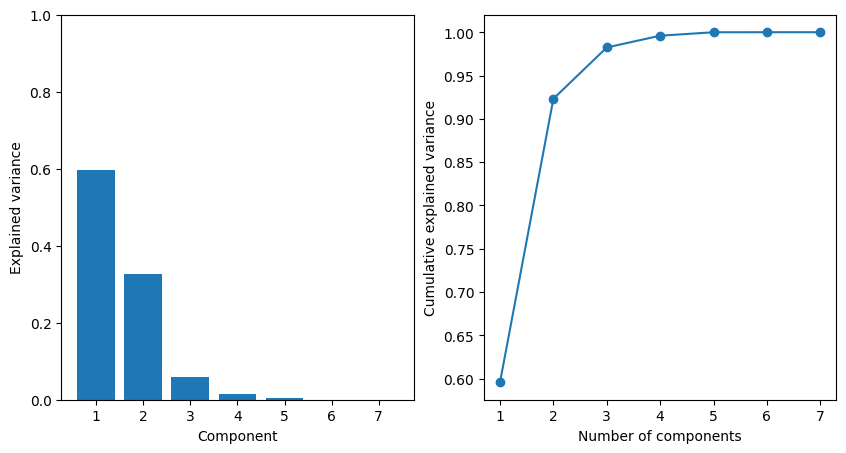

In [57]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(explained_var)+1), explained_var)
plt.ylim(0, 1)
plt.xlabel('Component')
plt.ylabel('Explained variance')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained_var)+1), np.cumsum(explained_var), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

Step 4: Compute eigenvectors & sort them

In [58]:
eigen_values, eigen_vectors = np.linalg.eig(C)
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx]
# top 2 components
eigen_vectors[:, 0].round(3), eigen_vectors[:, 1].round(3)

(array([ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244]),
 array([ 0.628,  0.27 , -0.234,  0.111, -0.202, -0.32 , -0.567]))

Step 5: Project data onto the first two principal components

In [69]:
X_pca = (eigen_vectors[:,:2].T @ X.T).T
# or
X_pca = X @ eigen_vectors[:,:2]
X_pca

,0,1
0,5.001985,-2.674746
1,5.015375,-2.525076
2,4.797424,-2.669240
3,4.462088,-2.281218
4,4.464433,-2.155551
...,...,...
295,-0.534616,0.529957
296,-0.339070,0.242824
297,-0.645354,0.514574
298,-0.863635,0.920253


Step 6: Plot the projected data

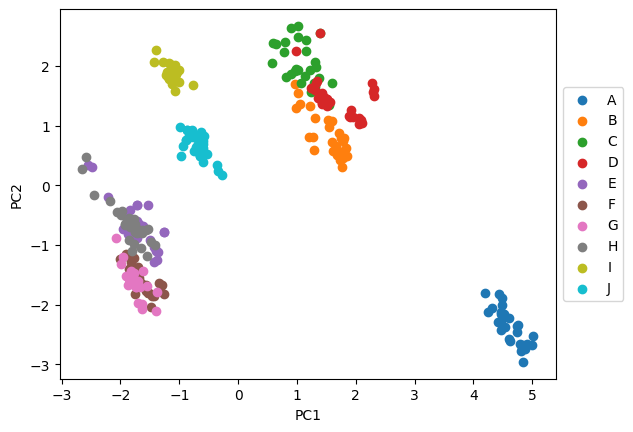

In [70]:
for brand in df['brand'].unique():
    X_pca_selected = X_pca[df['brand']==brand]
    plt.scatter(X_pca_selected[0], X_pca_selected[1], label=brand)
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Plot also the contribution of each original feature to the first two principal components

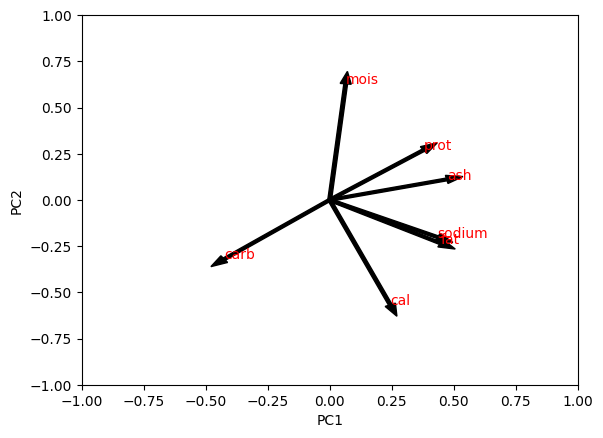

In [71]:
for i in range(7):
    plt.arrow(0, 0, eigen_vectors[i,0], eigen_vectors[i,1], color='k', width=0.015)
    plt.text(eigen_vectors[i,0], eigen_vectors[i,1], X.columns[i], color='r')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

---

Do the same with `PCA` from `sklearn.decomposition`.

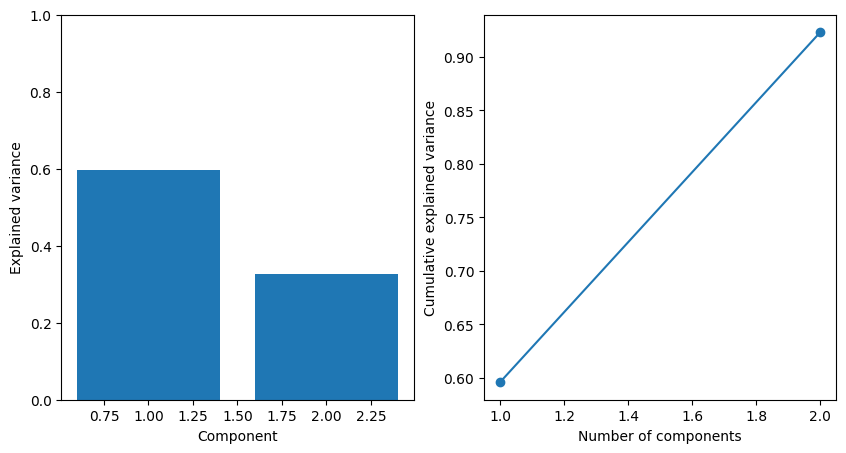

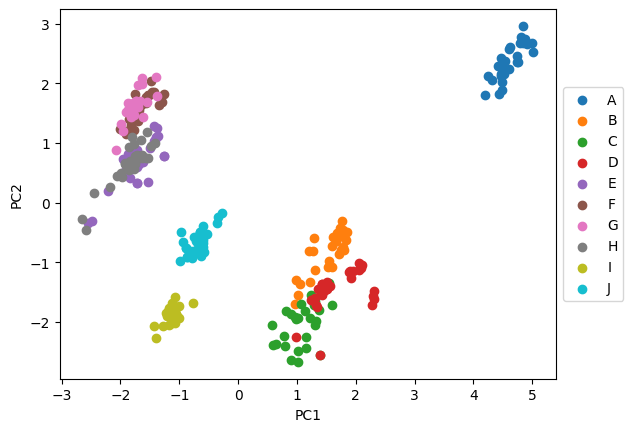

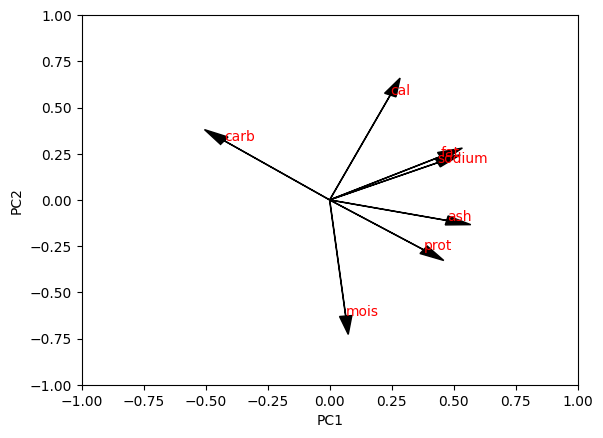

In [72]:
from sklearn.decomposition import PCA

# read
df = pd.read_csv('pizza.csv')
# select columns of interest
X = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]
# standardize
means = X.mean(axis=0)
stds = X.std(axis=0)
X = (X - means) / stds

# do PCA on X
pca = PCA(n_components=2)
pca.fit(X)

# get the principal components
components = pca.components_
# get the variance explained by each component
explained_ratio = pca.explained_variance_ratio_

# plot the variance explained by each component
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(explained_ratio)+1), explained_ratio)
plt.ylim(0, 1)
plt.xlabel('Component')
plt.ylabel('Explained variance')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained_ratio)+1), np.cumsum(explained_ratio), 'o-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# transform data
X_transformed = pca.transform(X)

# plot the transformed data
for brand in df['brand'].unique():
    plt.scatter(X_transformed[df['brand']==brand,0], X_transformed[df['brand']==brand,1], label=brand)
# legend outside the plot
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# plot the original basis vectors
for i in range(7):
    plt.arrow(0, 0, components.T[i,0], components.T[i,1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.text(components.T[i,0], components.T[i,1], X.columns[i], color='r')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The two methods do not give exactly the same results. Why?

In [75]:
components.round(3)

array([[ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244],
       [-0.628, -0.27 ,  0.234, -0.111,  0.202,  0.32 ,  0.567]])

In [77]:
eigen_vectors[:,:2].T.round(3)

array([[ 0.065,  0.379,  0.447,  0.472,  0.436, -0.425,  0.244],
       [ 0.628,  0.27 , -0.234,  0.111, -0.202, -0.32 , -0.567]])

if $\vec{u}$ is an eigen vector, $-\vec{u}$ is also an eigen vector;<br>
`sklearn`'s `PCA` returns the eigen vectors with oposite sign as the ones computed `np.linalg.eig`

---

## On the MNIST dataset

![MNIST database illustration](mnist.png)

The goal of this part is to see how we can use principal component analysis to compress data.

Load the `mnist10k.csv` dataset.
Split the labels from the pixels values.

In [121]:
# load data
df = pd.read_csv('mnist10k.csv', sep=',')
df.head()
X = df.drop('label', axis=1)
Y = df['label']
X.shape, Y.shape

((10000, 784), (10000,))

Plot one of the images

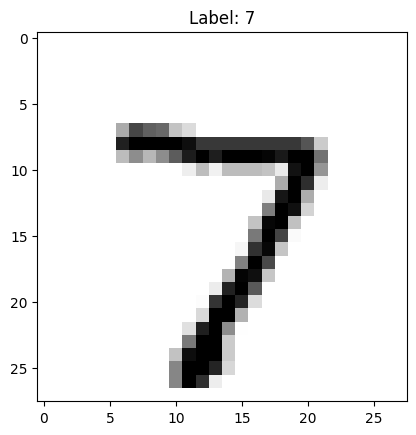

In [122]:
# plot the first image
plt.imshow(X[0:1].values.reshape(28,28), cmap='gray_r')
plt.title(f'Label: {Y[0]}')
plt.show()

Standardize the data to have zero mean and unit variance

In [123]:
# standardize
means = X.mean(axis=0)
stds = X.std(axis=0)
X_STD = (X - means) / stds
X_STD.fillna(0, inplace=True)

Perfom PCA on the data with `sklearn.decomposition.PCA`

In [124]:
# do PCA on X
pca = PCA(n_components=28*28)
pca.fit(X_STD)

PCA(n_components=784)

Plot the cumulative explained variance ratio, choose a number of components that explains at least $70\%$ of the variance

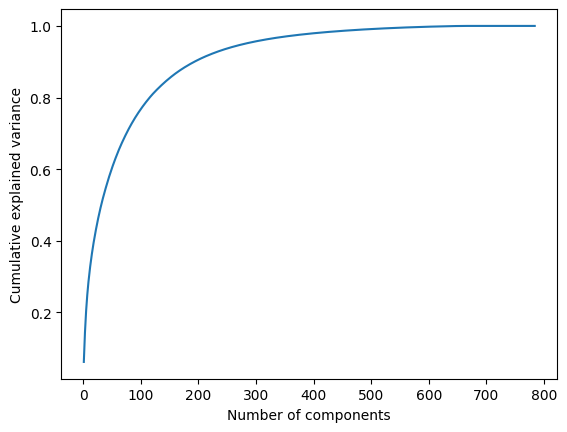

In [128]:
# get the variance explained by each component
explained_ratio = pca.explained_variance_ratio_

# plot the cumulative variance explained
plt.plot(np.arange(1, len(explained_ratio)+1), np.cumsum(explained_ratio))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

$\approx 100$ components are needed to explain $70\%$ of the variance

Perfom a new PCA on the data with `sklearn.decomposition.PCA` with $100$ components

In [129]:
# do PCA on X
pca = PCA(n_components=100)
pca.fit(X_STD)

PCA(n_components=100)